# Figure 3
INP concentrations, normalised by the number, surface area and volume of aerosol > 100 nm. *Note that currently, the normalised values are too small by a factor of ~1.5*.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

In [16]:
INP_concentrations = pd.read_csv('/home/users/erinraif/mphase_data/inp_data/mphase_ER_all.csv', index_col='temp_bin')
nX_data = pd.read_csv('/home/users/erinraif/mphase_data/inp_data/nX_calibrated_v1.csv',index_col='temp_bin')
# leg_types = pd.read_csv('/home/users/erinraif/acao_data/metadata/filter_leg_types.csv',
#                         index_col='unique_ID')
suffixes = ['nN','nS','nV']

In [17]:
INP_concentrations.columns = [col[:1].lower() + col[1:] for col in INP_concentrations.columns]

In [9]:
default_colors = mcolors.tab20
colors = list(default_colors.keys())
lines=['solid','dotted',(0,(5,1))]

AttributeError: module 'matplotlib.colors' has no attribute 'tab20'

In [6]:
def get_linestyle(count, colors, lines):
    c = colors[count % len(colors)]
    ls = lines[count // len(colors)]
    return ls, c

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


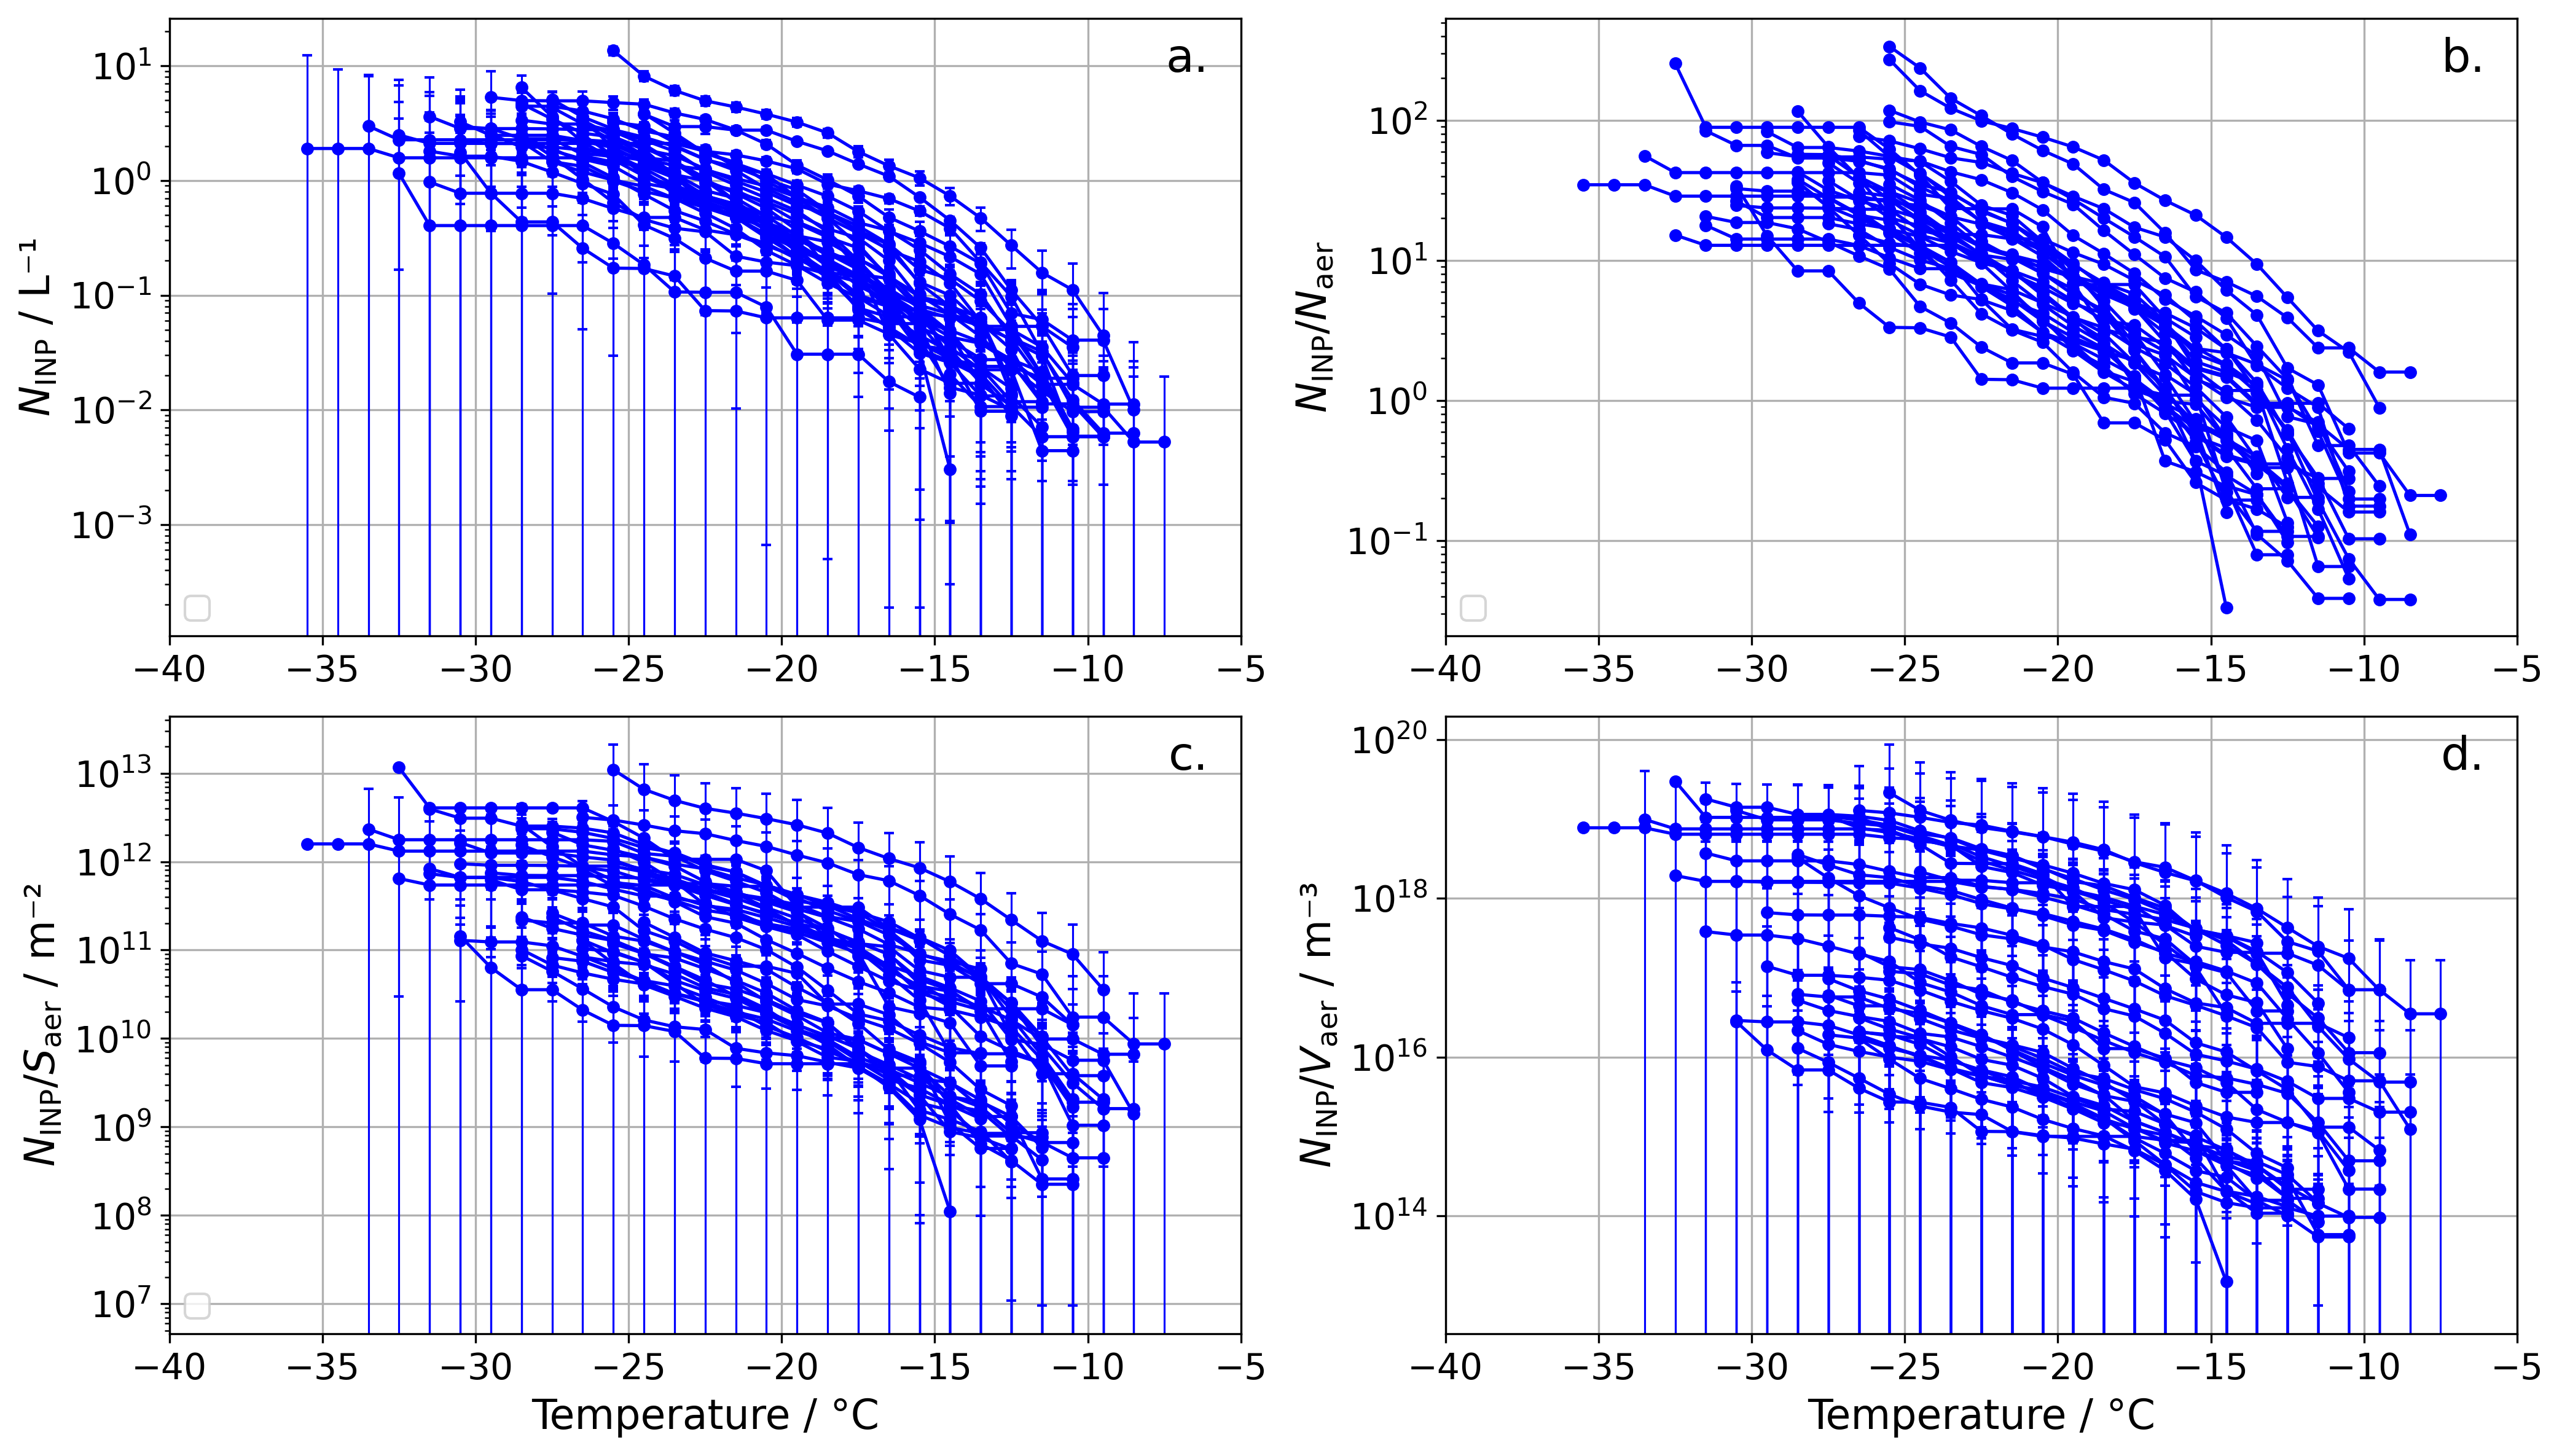

In [19]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(14,8),dpi=300)
(INP_ax, nN_ax), (nS_ax, nV_ax) = axes
for ax in axes.flatten():
    ax.set_xlim(-40,-5)
    ax.set_yscale('log')
    ax.grid()
    ax.tick_params(axis='x', labelsize=14) 
    ax.tick_params(axis='y', labelsize=14)

line_count = 0
# Loop through concentrations and ensure that there is a different style for
# each of the filter measurements.
for col in [col for col in INP_concentrations.columns if col.endswith('NT')]:
    y = INP_concentrations[col]
    y_err = INP_concentrations[col[:-2] + 'err']
    m = 'o'
    ms = 4
    line_count += 1
    INP_ax.errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker=m,
                linestyle='-', markersize=ms, capsize=2, elinewidth=0.75,
                color='blue', linewidth=1.25) 
        
    for (ax,s) in zip([nN_ax,nS_ax,nV_ax],suffixes):
        if col > 'c273':
            y = nX_data[col[:-2] + s]
            if s == 'nN':
                # N_aer
                y = y*1000
                
            y_errs = nX_data[col[:-2] + s + '_err']
            if len(y_errs.dropna()) == len(y.dropna()):
                ax.errorbar(y.dropna().index, y.dropna(), y_errs.dropna(),marker=m,
                linestyle='-', markersize=ms, capsize=2, elinewidth=0.75,
                color='blue', linewidth=1.25)
            else:
                ax.plot(y.dropna().index, y.dropna(),marker=m,
                        linestyle='-', markersize=ms,
                        color='blue', linewidth=1.25)

for ax, s in zip(axes.flatten(), ['a.', 'b.', 'c.', 'd.']):
    ax.text(0.97, 0.97, s, ha='right', va='top', fontsize=18,
            transform=ax.transAxes)


INP_ax.set_ylabel(r'$N_\mathrm{INP}$ / L⁻¹', size=16)
nN_ax.set_ylabel('$N_\mathrm{INP}/N_\mathrm{aer}$',fontsize=16)
nS_ax.set_ylabel('$N_\mathrm{INP}/S_\mathrm{aer}$ / m⁻²',fontsize=16)
nV_ax.set_ylabel('$N_\mathrm{INP}/V_\mathrm{aer}$ / m⁻³',fontsize=16)
nS_ax.set_xlabel('Temperature / °C', fontsize=16)
nV_ax.set_xlabel('Temperature / °C', fontsize=16)   
INP_ax.legend(loc='lower left', ncol=2,fontsize=12)
nN_ax.legend(loc='lower left', ncol=2,fontsize=12)
nS_ax.legend(loc='lower left', ncol=2,fontsize=12)
fig.tight_layout()
# fig.savefig('./imgs/fig_03_inp_concs_and_norms.png')
# fig.savefig('./imgs/fig_03_inp_concs_and_norms.eps')
